In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('logistic.csv')

In [3]:
data.head(3)

,Gender,Age,Salary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


In [4]:
data.isnull().sum()

Gender       0
Age          0
Salary       0
Purchased    0
dtype: int64

In [5]:
data['Gender'].replace({'Male':'1','Female':'0'},inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_1796\2354845592.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace({'Male':'1','Female':'0'},inplace=True)


In [6]:
data.head(3)

,Gender,Age,Salary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0


In [7]:
data['Purchased'].value_counts() #imbalace data also called bias, there are two method handle bias 1) under_sampling 2) over_sampling

Purchased
0    257
1    143
Name: count, dtype: int64

In [8]:
x=data.iloc[:,:-1]

In [9]:
y=data['Purchased']

In [10]:
#method 1 for balance , first install library
# pip install imblearn 

In [11]:
from imblearn.under_sampling import RandomUnderSampler # equal to become low 

In [12]:
rus=RandomUnderSampler()

In [13]:
ru_x, ru_y =rus.fit_resample(x,y)

C:\Program Files\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [14]:
ru_y.value_counts()

Purchased
0    143
1    143
Name: count, dtype: int64

In [15]:
#method 2 for balance

In [16]:
from imblearn.over_sampling import RandomOverSampler # low increase over the high

In [17]:
ros=RandomOverSampler()

In [18]:
ro_x,ro_y =ros.fit_resample(x,y)

C:\Program Files\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [19]:
ro_y.value_counts()

Purchased
0    257
1    257
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(ru_x,ru_y, test_size=0.2,random_state=42) # we can use here both method 1 and 2 are similar handle the bias

#now we use here method 1 its depend on you 

In [22]:
len(x_train)

228

In [23]:
len(x_test)

58

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression()

In [26]:
lr.fit(x_test,y_test)

C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
lr.predict([[1,	45,	22000]])

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [28]:
lr.score(x_test,y_test)*100,  lr.score(x_train,y_train)*100

(91.37931034482759, 80.26315789473685)

In [29]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score #pip install matrix

In [30]:
cf=confusion_matrix(y_test,lr.predict(x_test))

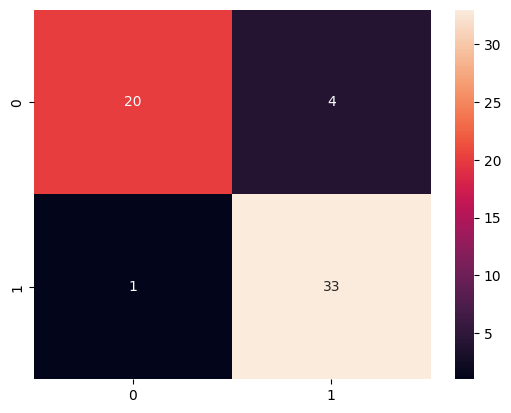

In [31]:
sns.heatmap(cf,annot=True)
plt.show()

In [32]:
precision_score(y_test,lr.predict(x_test))*100

89.1891891891892

In [33]:
recall_score(y_test,lr.predict(x_test))*100

97.05882352941177

In [34]:
f1_score(y_test,lr.predict(x_test))*100

92.95774647887323